Beata Sirowy
# Building a DAG using Airflow (a demo)
Based on the IBM Data Engineering Professional Certificate, _ETL and Data Pipelines with Shell, Airflow and Kafka_  and Apache Airflow documentation(airflow.apache.org) <br> Images' copyright: IBM Skills Network and airflow.apache.org

In this demo we create a simple Airflow pipeline - a Python script that defines an Airflow direct acyclic graph (DAG) object in the following steps:
- listing the key components of a DAG definition file,
- creating tasks by instantiating operators in our DAG definition file,
- setting up dependencies amongst tasks. 

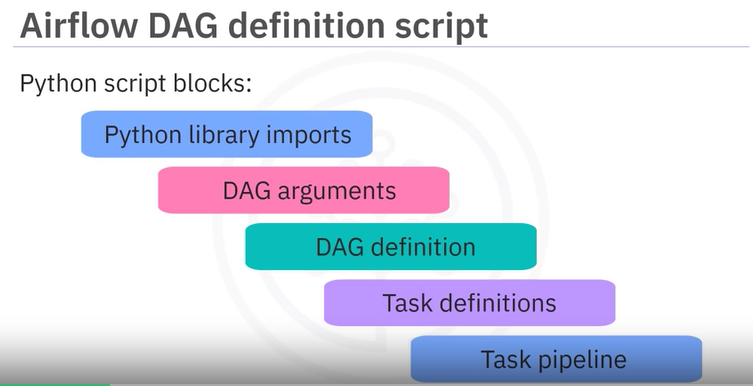

## The task

Our task is to create a simple pipeline called simple_example_DAG.py that
- prints a greeting and then 
- prints the current date and time.
We will also schedule it to repeat the process every 5 seconds. 

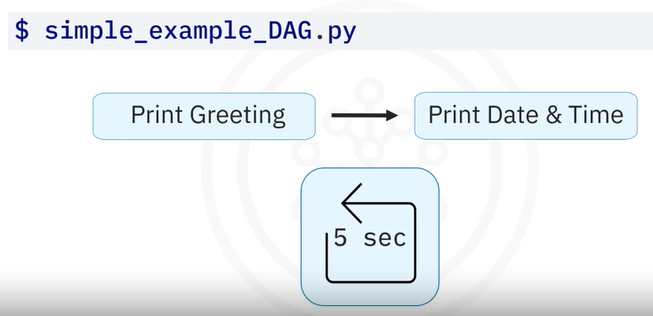

### Step 1: Python library imports

In [ ]:
from datetime import datetime, timedata
from airflow.models import DAG
from airflow.operators.bash_operator import BashOperator

### Step 2: DAG arguments

DAG arguments are specified as a Python dict()

In [ ]:
default_args = {
    'owner': 'name_of_the_owner',
    'start_date': datetime(2024, 10, 10),
    'retries': 1,
    'retry_delay': timedelta(minutes=5), 
}

### Step 3: DAG definition

In [ ]:
dag = DAG('simple_example',
          description = 'A simple example DAG demo',
          default_args = default_args, #specified in the previous block
          schedule = timedelta(seconds = 5)
)

### Step 4: Task definitions

We define 2 tasks, both of them call a bash command.

In [ ]:
task1 = BashOperator(
    task_id="print_hello",
    bash_command = 'echo \'Greetings, the date and time are \'',
    dag = dag, 
)

In [ ]:
task 2 = BashOperator(
    task_id = 'print_date',
    bash_command = 'date',
    dag = dag,
)

### Step 5: Task pipeline - specifying dependencies

In [ ]:
task1 >> task2